# **End-To-End Machine Learning Project - Bank Marketing Data**

This is an End To End Machine Learning Project by Shivan Kumar via his YouTube channel: @engineeringwalabhaiya. All credit goes to Shivan for providing this valuable tutorial online for free. I would like to thank him for helping people like me who would like to learn.

This project is about using on bank marketing data to predict how many customers will take the loan. Multiple Machine Learning models are explored after the standard data cleaning and normalization of data.

Once the model has been rigorously tested and model is selected, we test and validate our data to come to our conclusions.

It has been a very interesting experience as I follow this tutorial to understand concepts surrounding machine learning.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Import data into google colab

from google.colab import files
upload = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Checking for null values

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [6]:
df.groupby('y').size()

,0
y,
no,36548
yes,4640


In [7]:
df['Output_Label'] = (df.y == 'yes').astype('int')

In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [9]:
df.groupby('y').size()

,0
y,
no,36548
yes,4640


In [10]:
# Accidentally mis-spelled a column so I corrected it and now I'm dropping the wrong column

# df.drop(['Output_Lable'], axis=1, inplace=True)

In [11]:
df.groupby('Output_Label').size()

,0
Output_Label,
0,36548
1,4640


In [12]:
df.groupby('y').size()

,0
y,
no,36548
yes,4640


In [13]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [14]:
def calc_prevalence(y_actual):
  return ((sum(y_actual)/len(y_actual))*100)

In [15]:
print('Percentage of customers who agreed to buy our Bank Term Deposit: %.3f'%calc_prevalence(df['Output_Label'].values), '%')

Percentage of customers who agreed to buy our Bank Term Deposit: 11.265 %


In [16]:
# Calling all rows from the first 10 features

df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [17]:
# Calling all rows from the last 10 features

df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Output_Label
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
print('Number of columns:', len(df.columns))

Number of columns: 22


### Finding the unique data in all our categorical features

In [20]:
# For each column

for a in list(df.columns):

  # get a list of unique values
  n = df[a].unique()

  # if the number of unique values is less than 30, print the values. Otherwise, print the number of unique values
  if len(n)<30:
    print('')
    print(a)
    print('')
    print(n)

  else:
    print(a + ': ' + str(len(n)) + ' unique values')

age: 78 unique values

job

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital

['married' 'single' 'divorced' 'unknown']

education

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default

['no' 'unknown' 'yes']

housing

['no' 'yes' 'unknown']

loan

['no' 'yes' 'unknown']

contact

['telephone' 'cellular']

month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week

['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values

pdays

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous

[0 1 2 3 4 5 6 7]

poutcome

['nonexistent' 'failure' 'success']

emp.var.rate

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx

[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.0

## **Data Visualization**

### Numerical Features

In [21]:
cols_num = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx', 'nr.employed', 'age', 'euribor3m']

In [22]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,-36.4,5191.0,56,4.857
1,1,999,0,1.1,-36.4,5191.0,57,4.857
2,1,999,0,1.1,-36.4,5191.0,37,4.857
3,1,999,0,1.1,-36.4,5191.0,40,4.857
4,1,999,0,1.1,-36.4,5191.0,56,4.857


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

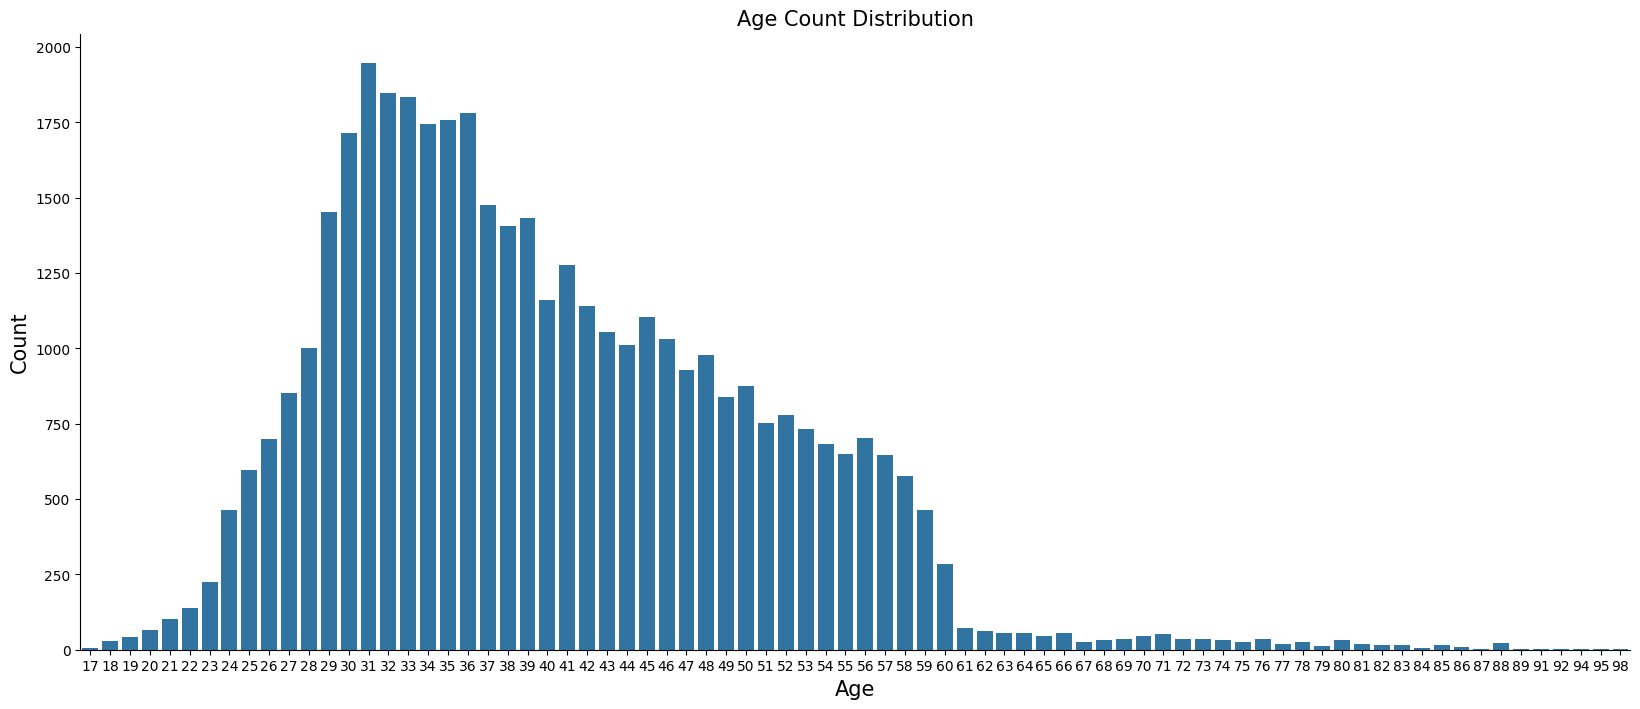

In [24]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = df[cols_num])
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
sns.despine()

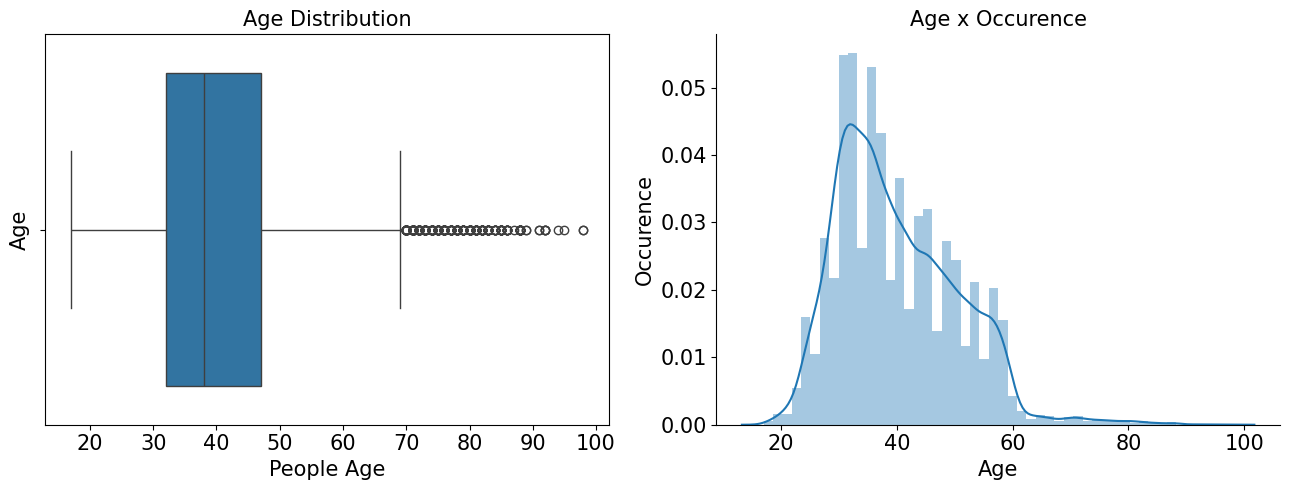

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize = 15)
ax1.set_ylabel('Age', fontsize = 15)
ax1.set_title('Age Distribution', fontsize = 15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize = 15)
ax2.set_ylabel('Occurence', fontsize = 15)
ax2.set_title('Age x Occurence', fontsize = 15)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout()

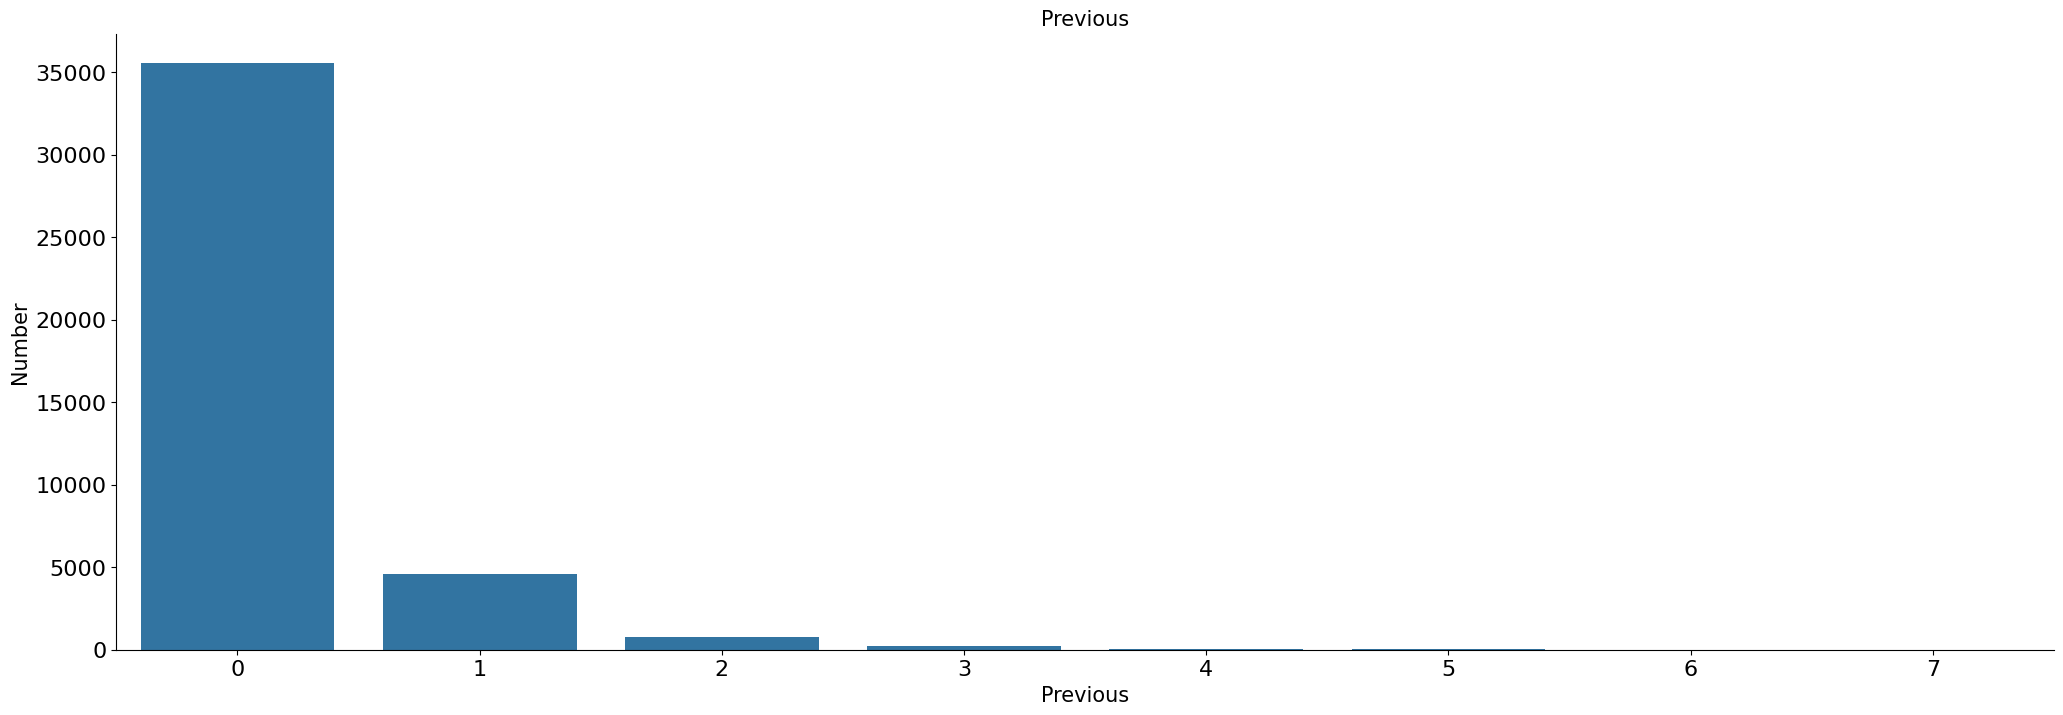

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize = 15)
ax.set_ylabel('Number', fontsize = 15)
ax.set_title('Previous', fontsize = 15)
ax.tick_params(labelsize = 16)
sns.despine()

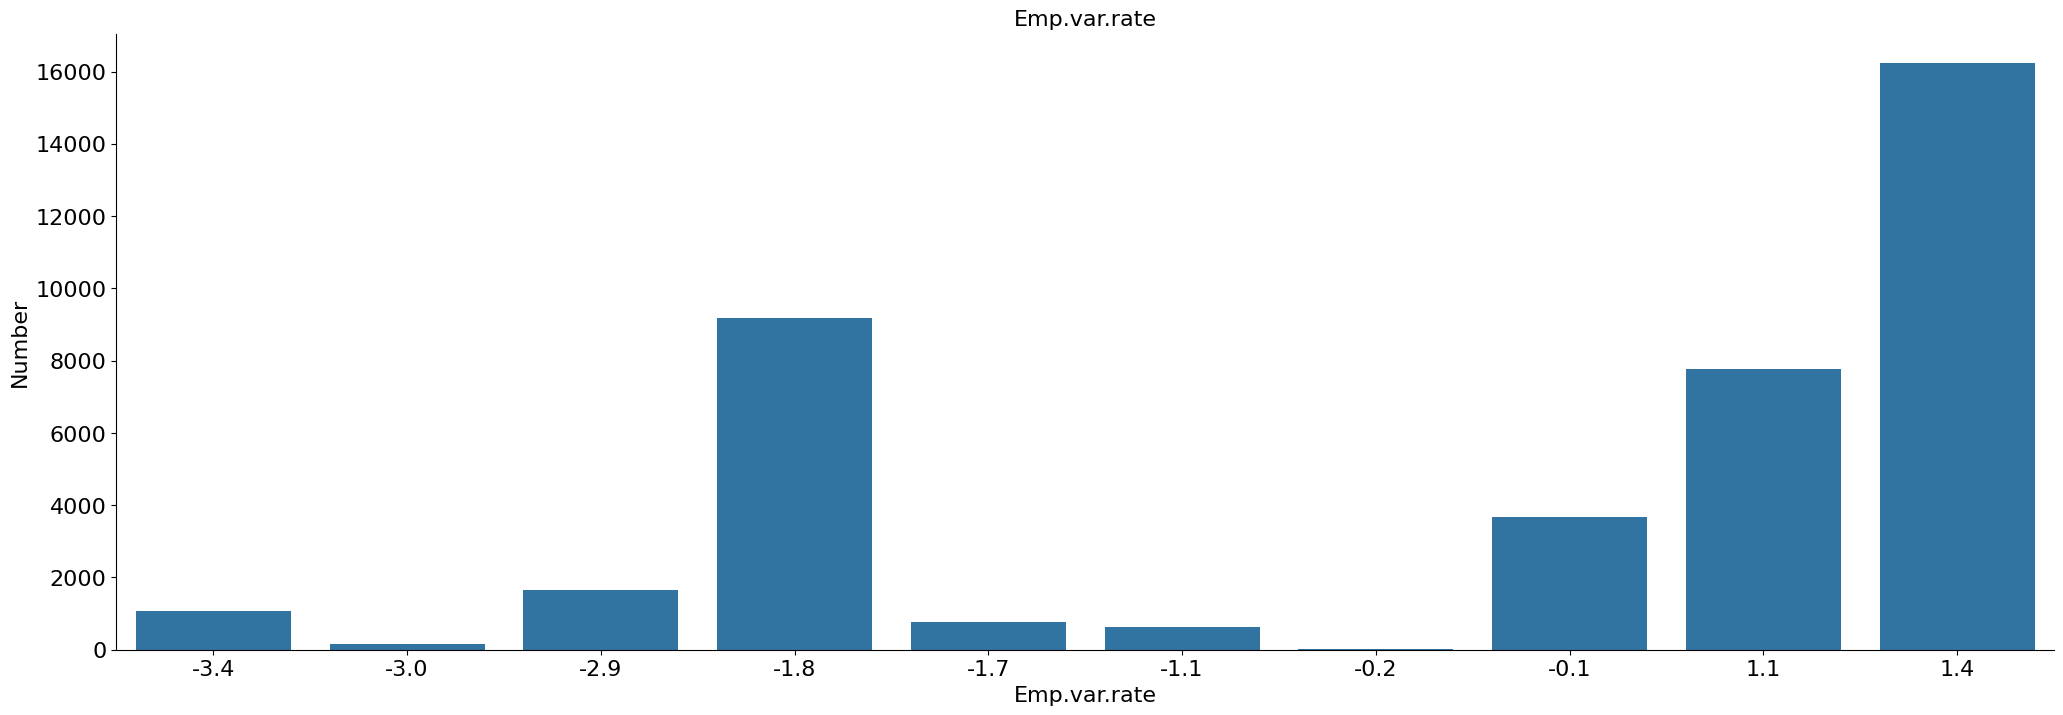

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize = 16)
ax.set_ylabel('Number', fontsize = 16)
ax.set_title('Emp.var.rate', fontsize = 16)
ax.tick_params(labelsize = 16)
sns.despine()

In [28]:
df[cols_num].isnull().sum()

,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.conf.idx,0
nr.employed,0
age,0
euribor3m,0


### Categorical Features

In [29]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [30]:
df[cols_cat].isnull().sum()

,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
poutcome,0


## **One Hot Encoding**

In [31]:
cols_new_cat = pd.get_dummies(df[cols_cat], drop_first= False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


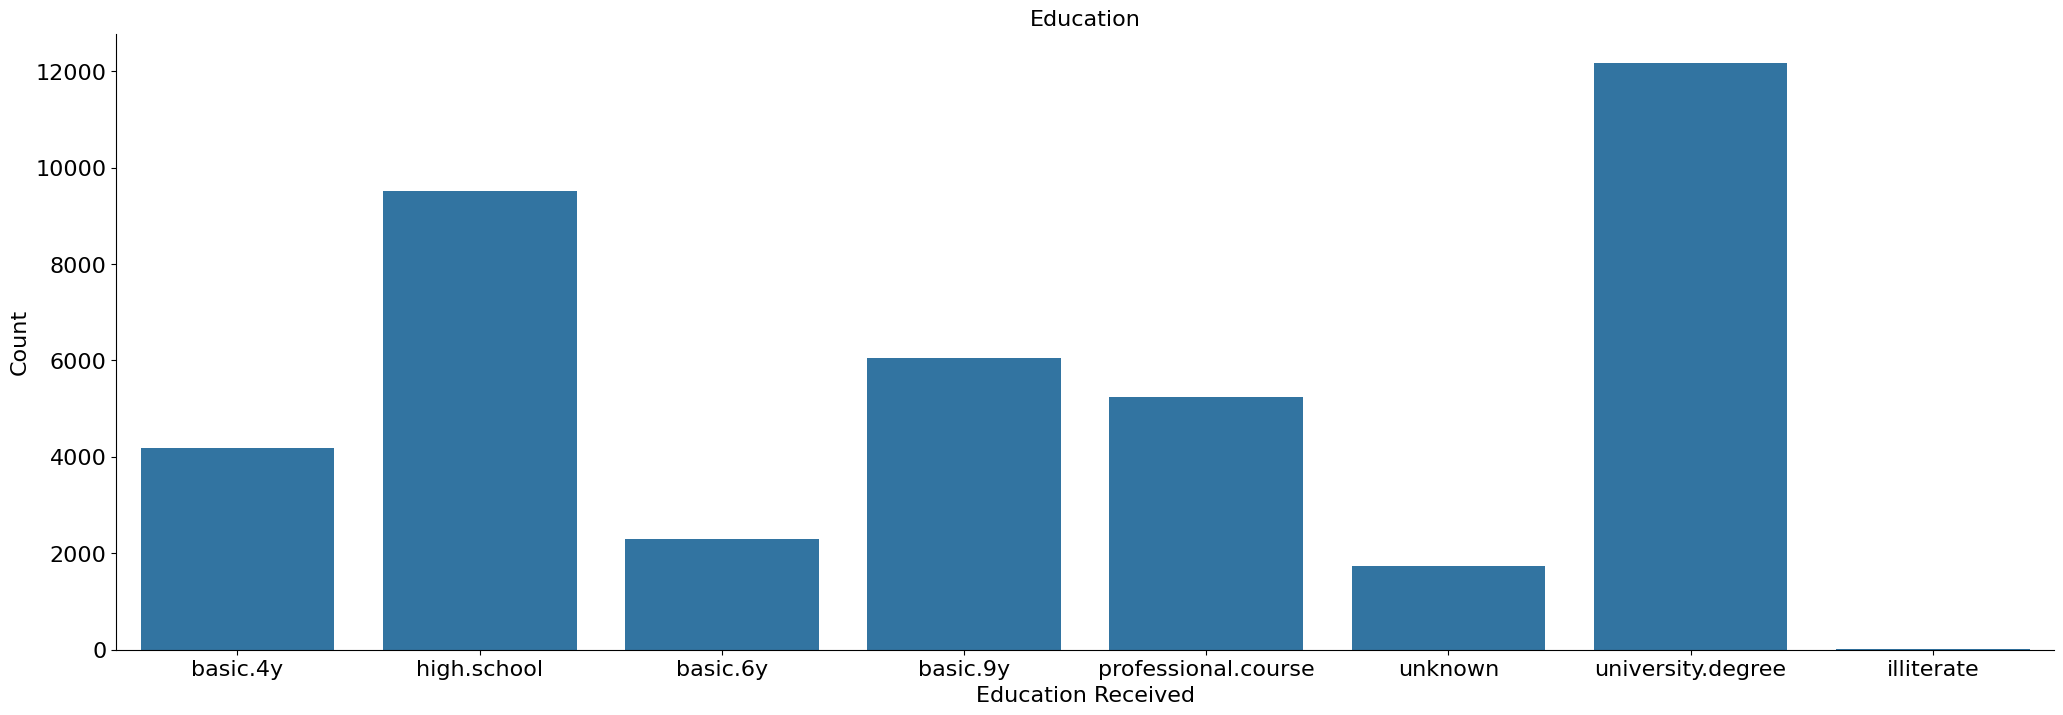

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Received', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('Education', fontsize = 16)
ax.tick_params(labelsize = 16)
sns.despine()

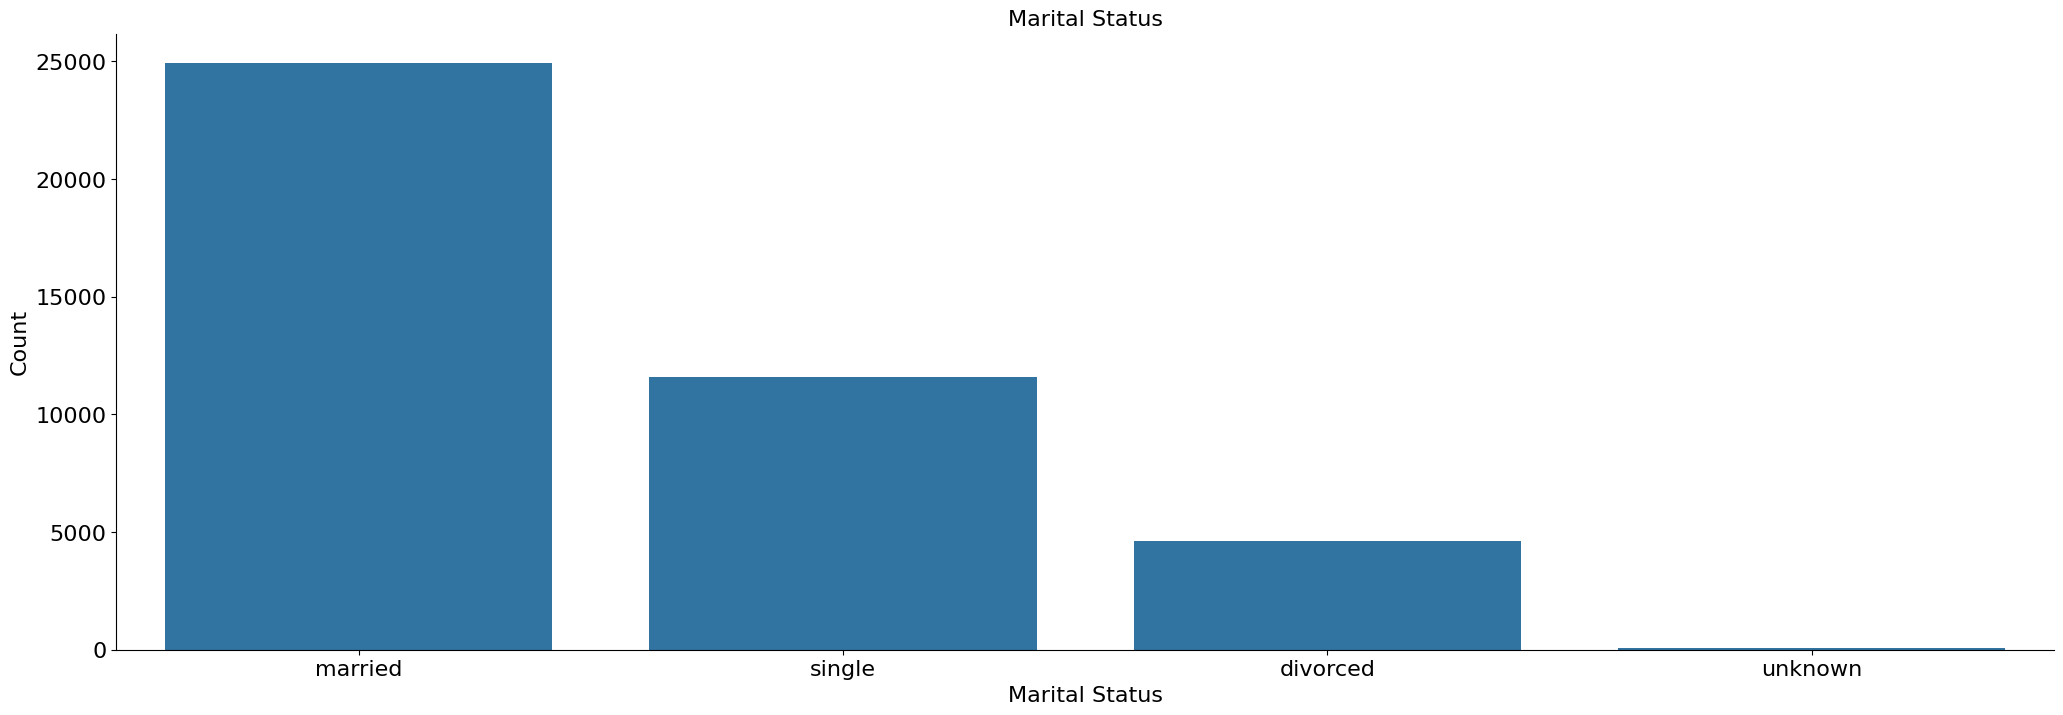

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('Marital Status', fontsize = 16)
ax.tick_params(labelsize = 16)
sns.despine()

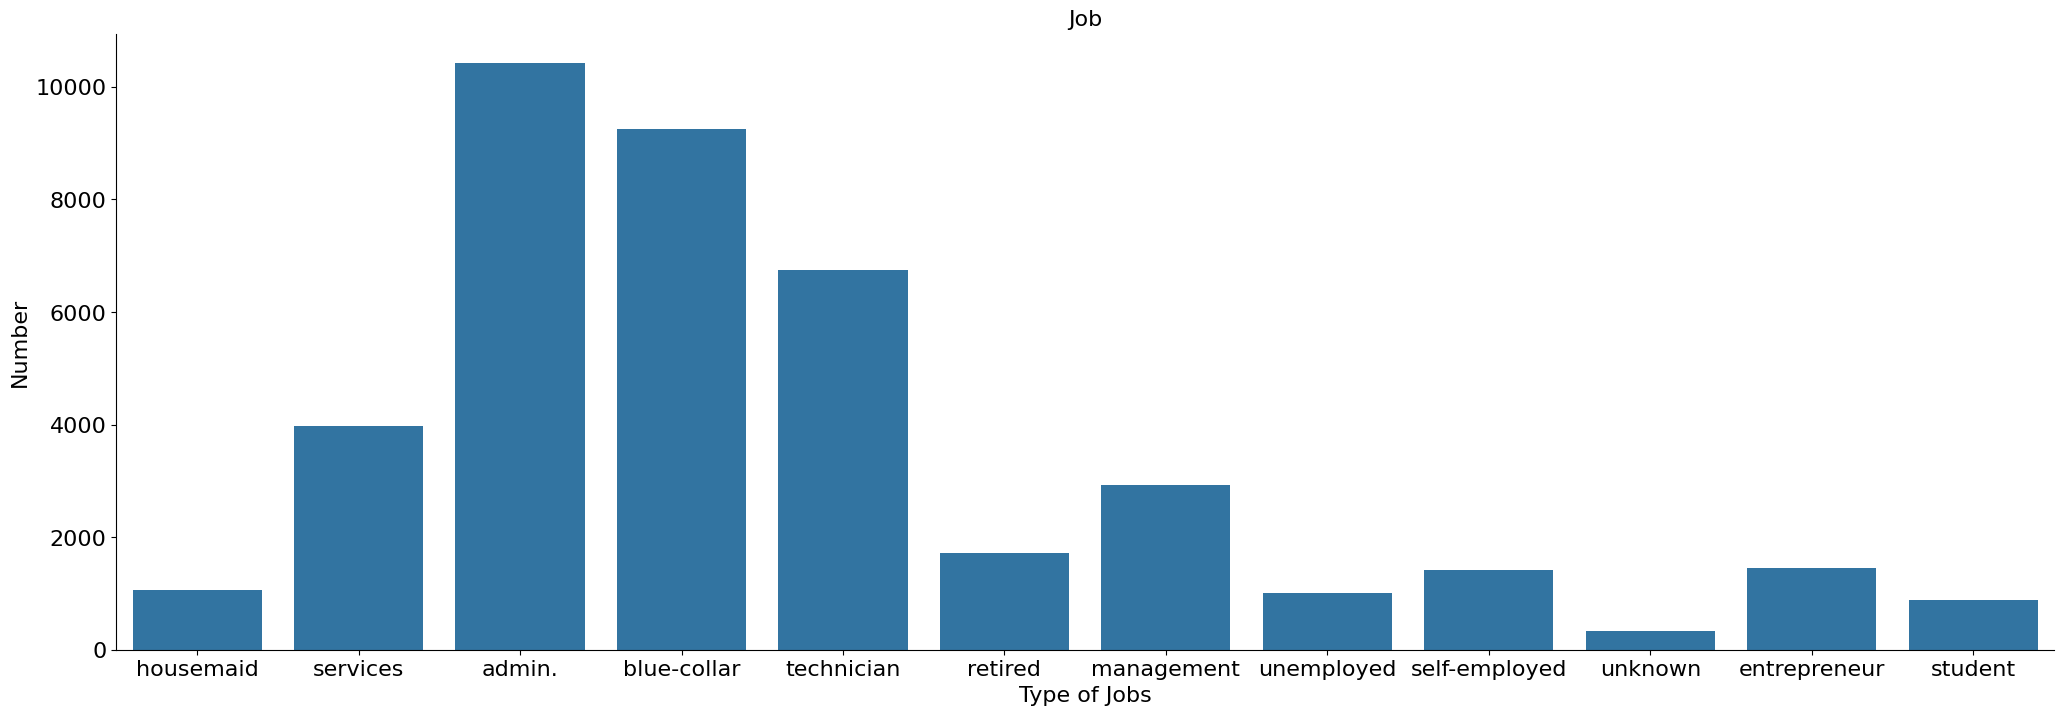

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Type of Jobs', fontsize = 16)
ax.set_ylabel('Number', fontsize = 16)
ax.set_title('Job', fontsize = 16)
ax.tick_params(labelsize = 16)
sns.despine()

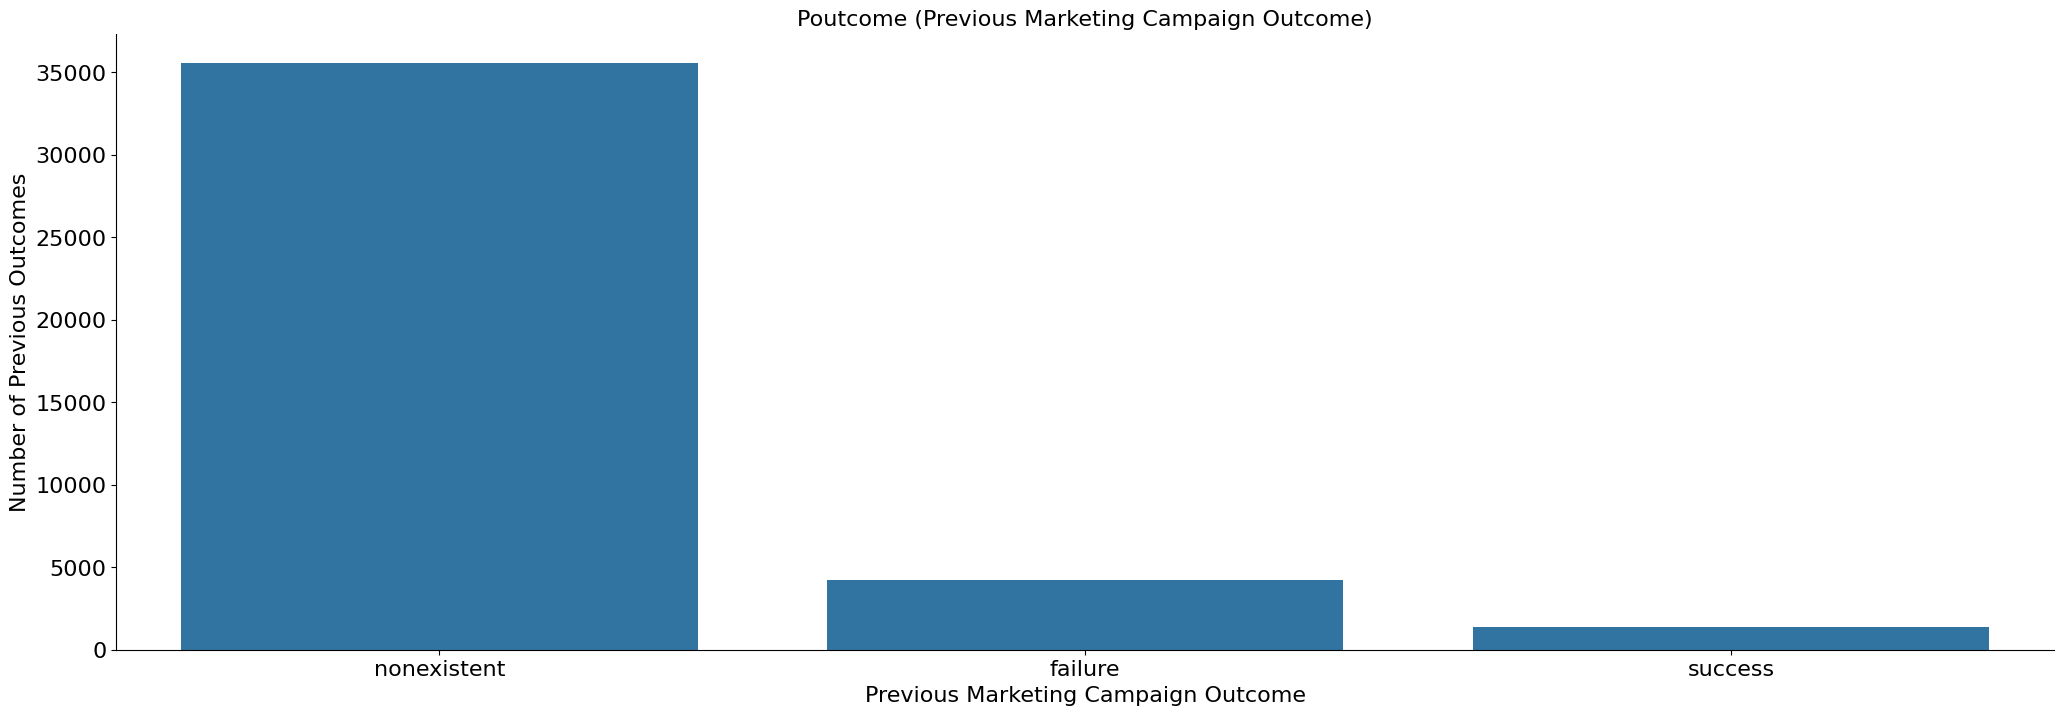

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize = 16)
ax.set_ylabel('Number of Previous Outcomes', fontsize = 16)
ax.set_title('Poutcome (Previous Marketing Campaign Outcome)', fontsize = 16)
ax.tick_params(labelsize = 16)
sns.despine()

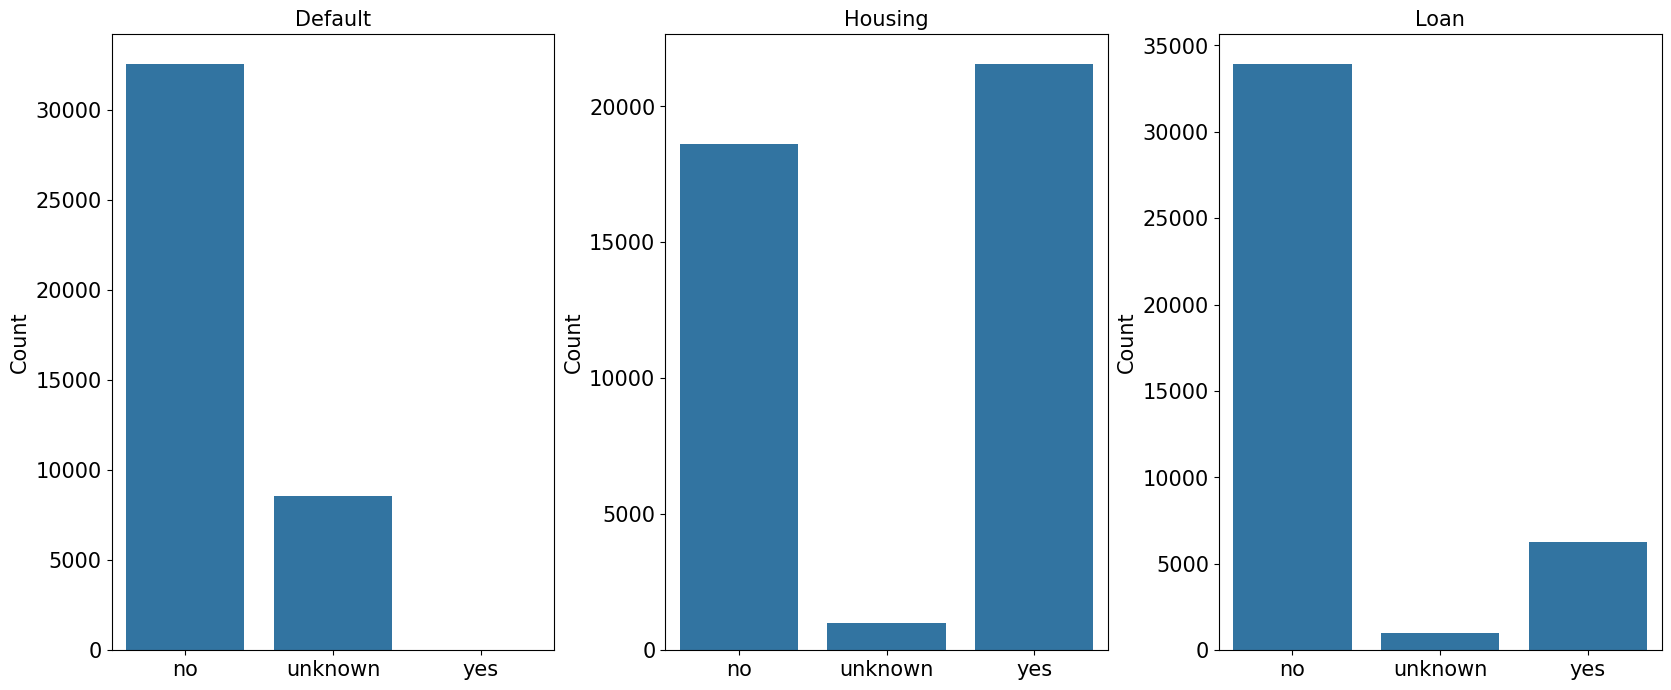

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize = 15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize = 15)
ax1.tick_params(labelsize = 15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize = 15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize = 15)
ax2.tick_params(labelsize = 15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize = 15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize = 15)
ax3.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.25)

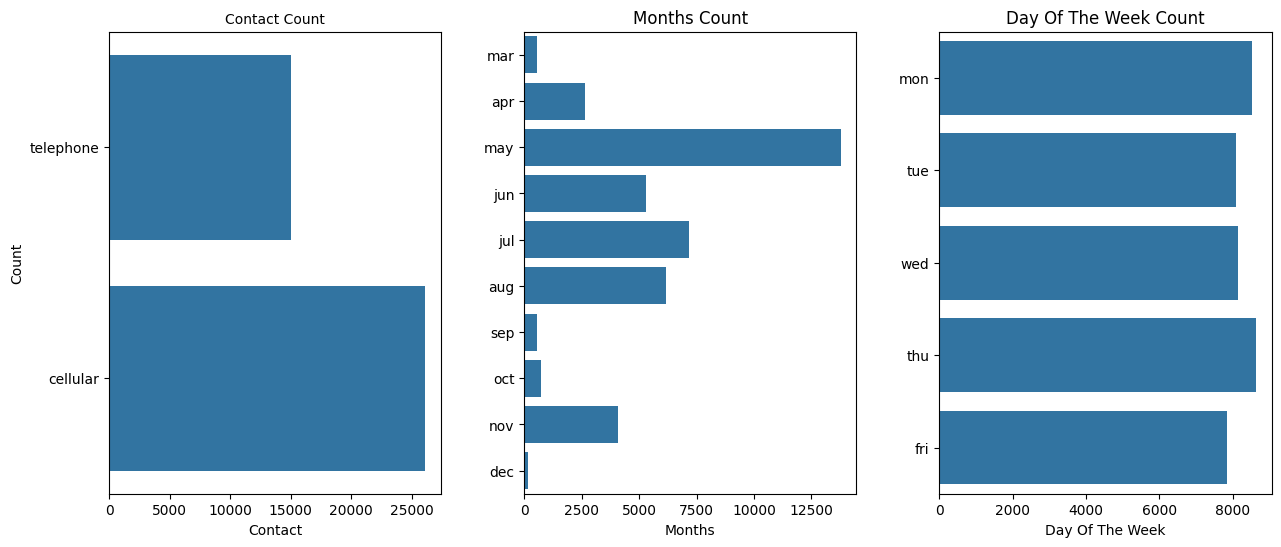

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data = df[cols_cat]['contact'], ax = ax1)
ax1.set_title('Contact Count', fontsize = 10)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.tick_params(labelsize = 10)

sns.countplot(data = df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_title('Months Count')
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.tick_params(labelsize = 10)

sns.countplot(data = df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_title('Day Of The Week Count')
ax3.set_xlabel('Day Of The Week', fontsize = 10)
ax3.set_ylabel('')
ax3.tick_params(labelsize = 10)

plt.subplots_adjust(wspace = 0.25)

In [38]:
df = pd.concat([df, cols_new_cat], axis = 1)

In [39]:
cols_all_cat = list(cols_new_cat.columns)

In [40]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [41]:
# Summary of Feature Engineering

print('Total Number Of Features: ', len(cols_all_cat + cols_num))
print('Numerical Features: ', len(cols_num))
print('Categorical Features: ', len(cols_all_cat))

Total Number Of Features:  61
Numerical Features:  8
Categorical Features:  53


In [42]:
df[cols_all_cat].isnull().sum().sort_values(ascending=False)

,0
job_admin.,0
housing_no,0
housing_yes,0
loan_no,0
loan_unknown,0
loan_yes,0
contact_cellular,0
contact_telephone,0
month_apr,0
month_aug,0


In [43]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['Output_Label']]

In [44]:
df_data

,campaign,pdays,previous,emp.var.rate,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Output_Label
0,1,999,0,1.1,-36.4,5191.0,56,4.857,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,-36.4,5191.0,57,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,-36.4,5191.0,37,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,-36.4,5191.0,40,4.857,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,-36.4,5191.0,56,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,-1.1,-50.8,4963.6,73,1.028,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,1
41184,1,999,0,-1.1,-50.8,4963.6,46,1.028,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,0
41185,2,999,0,-1.1,-50.8,4963.6,56,1.028,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,0
41186,1,999,0,-1.1,-50.8,4963.6,44,1.028,False,False,False,False,False,False,False,Fal

# **Building Training, Validation & Test Samples**

In [45]:
# 70% data for Training and 30% data for Validation & Testing (15% each for Validation & Testing)

# Shuffling the sample data
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [46]:
# Splitting the Data for Validation & Testing purposes

df_valid_test = df_data.sample(frac = 0.30, random_state= 42)
print('Split Size: %.3f'%(len(df_valid_test)/len(df_data)))

Split Size: 0.300


In [47]:
# Further splitting the data between Validation & Testing (15% each)

df_test = df_valid_test.sample(frac = 0.5, random_state= 42)
df_valid = df_valid_test.drop(df_test.index)

In [48]:
print(df_test.shape)

(6178, 62)


In [49]:
print(df_valid.shape)

(6178, 62)


In [50]:
# Use the rest of the data for Training purposes

df_train_all = df_data.drop(df_valid_test.index)

In [51]:
print(df_train_all.shape)

(28832, 62)


In [52]:
# Checking the prevalence of each data
print('Test Prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_test.Output_Label.values)))
print('Valid Prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_valid.Output_Label.values)))
print('Train All Prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.Output_Label.values)))

Test Prevalence(n = 6178):11.411
Valid Prevalence(n = 6178):11.314
Train All Prevalence(n = 28832):11.224


In [53]:
# Split the training data into positive and negative

rows_pos = df_train_all.Output_Label == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)], axis = 0)

# shuffle the order of training samples
df_train = df_train.sample(n = len(df_train), random_state= 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.Output_Label.values)))

Train balanced prevalence(n = 6472):50.000


In [54]:
# split the validation data into positive and negative
rows_pos = df_valid.Output_Label == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state= 42)], axis = 0)

# shuffle the order of training samples
df_valid = df_valid.sample(n = len(df_valid), random_state= 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.Output_Label.values)))

Valid balanced prevalence(n = 1398):50.000


In [55]:
# split the test data into positive and negative
rows_pos = df_test.Output_Label == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state= 42)], axis = 0)

# shuffle the order of training samples
df_test = df_test.sample(n = len(df_test), random_state= 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.Output_Label.values)))

Test balanced prevalence(n = 1410):50.000


In [56]:
# Saving all our data into csv format

df_train_all.to_csv('df_train_all.csv', index = False)
df_train.to_csv('df_train.csv', index = False)
df_valid.to_csv('df_valid.csv', index = False)
df_test.to_csv('df_test.csv', index = False)

# Downloading files to the computer
files.download('df_train_all.csv')
files.download('df_train.csv')
files.download('df_valid.csv')
files.download('df_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))
files.download('cols_input.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Filling any missing values with the mean of the column

In [58]:
def fill_my_missing(df, df_mean, col2use):
  # This function fills the missing values

  # Checking the existing columns
  for c in col2use:
    assert c in df.columns, c + 'not in df'
    assert c in df_mean['col'].values, c + 'not in df_mean'

  # replace the mean
  for c in col2use:
    mean_value = df_mean.loc[df_mean['col'] == c, 'mean_val'].values[0]
    df[c] = df[c].fillna(mean_value)
  return df

In [59]:
# Saving the means file to csv

df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv', index = True)

# downloading file to the computer
files.download('df_mean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
# For each column in the data, calculating the mean value

df_mean_in = pd.read_csv('df_mean.csv', names = ['col', 'mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.552442
2,pdays,962.352456
3,previous,0.173037
4,emp.var.rate,0.078278


In [61]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [62]:
# Create a X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['Output_Label'].values
y_valid = df_valid['Output_Label'].values

print('Training All Shapes:', X_train_all.shape)
print('Training Shapes:', X_train.shape, y_train.shape)
print('Validation Shapes:', X_valid.shape, y_valid.shape)

Training All Shapes: (28832, 61)
Training Shapes: (6472, 61) (6472,)
Validation Shapes: (1398, 61) (1398,)


### **Scaling Data**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [65]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [66]:
# Loading the file
scaler = pickle.load(open(scalerfile, 'rb'))

In [67]:
# Transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# **Model Selection**

In [68]:
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# def calc_specificity(y_actual, y_pred, thresh):
  # true_negatives = sum((y_pred < thresh) & (y_actual == 0))
  # total_negatives = sum(y_actual == 0)
  # return float(true_negatives) / float(total_negatives) if total_negatives != 0 else 0.0

  # Ensure y_pred is binary
  # y_pred_binary = (y_pred > thresh).astype(int) # Convert predictions to binary (0 or 1)
  # y_actual_binary = y_actual.astype(int) # Convert actual values to integers

  # Calculate true negatives and total negatives
  # true_negatives = sum(y_pred_binary == 0) & (y_actual_binary == 0)
  # total_negatives = sum(y_actual_binary == 0)

  # Avoid division by zero
  # return true_negatives / total_negatives if total_negatives > 0 else 0
  # calculations specificity
  # return sum(y_pred < thresh) & (y_actual == 0) / sum(y_actual == 0)

# Function to print metrics and return them
# def print_report(y_actual, y_pred, thresh):
  # Handle multidimensional predictions (e.g. from predict_proba)
  # if len(y_pred.shape) > 1:
    # y_pred = y_pred[:, 1] # Use probabilities for the positive class

  # auc = roc_auc_score(y_actual, y_pred)
  # accuracy = accuracy_score(y_actual, (y_pred > thresh))
  # recall = recall_score(y_actual, (y_pred > thresh))
  # precision = precision_score(y_actual, (y_pred > thresh))
  # specificity = calc_specificity(y_actual, y_pred, thresh)
  # f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  # print(f"AUC: {auc:.3f}")
  # print(f"Accuracy: {accuracy:.3f}")
  # print(f"Recall: {recall:.3f}")
  # print(f"Precision: {precision:.3f}")
  # print(f"Specificity: {specificity.item():.3f}")
  # print('prevalence:%.3f'%calc_prevalence(y_actual))
  # print(f"f1: {f1:.3f}")
  # print(' ')
  # return auc, accuracy, recall, precision, specificity, f1



In [69]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to calculate specificity
def calc_specificity(y_actual, y_pred, thresh):
    true_negatives = sum((y_pred < thresh) & (y_actual == 0))
    total_negatives = sum(y_actual == 0)
    return float(true_negatives) / float(total_negatives) if total_negatives != 0 else 0.0

# Function to calculate and print metrics
def print_report(y_actual, y_pred, thresh):
    # Handle probabilities for binary classification (if y_pred is 2D)
    if len(y_pred.shape) > 1:
        y_pred = y_pred[:, 1]  # Use probabilities for the positive class

    # Metrics calculation
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = f1_score(y_actual, (y_pred > thresh))

    # Convert all metrics to Python-native floats
    metrics = [auc, accuracy, recall, precision, specificity, f1]
    metrics = [float(metric) for metric in metrics]

    # Print results
    print(f"AUC: {metrics[0]:.3f}")
    print(f"Accuracy: {metrics[1]:.3f}")
    print(f"Recall: {metrics[2]:.3f}")
    print(f"Precision: {metrics[3]:.3f}")
    print(f"Specificity: {metrics[4]:.3f}")
    print(f"F1: {metrics[5]:.3f}")

    return metrics  # Return all metrics as Python floats

# Example usage
thresh = 0.5

# Replace these variables with your actual data
# Example placeholders
# y_train, y_valid = actual labels (numpy arrays or lists)
# y_train_preds, y_valid_preds = predictions (numpy arrays or lists, e.g., probabilities)
# Example: y_train = np.array([0, 1, 1, 0, 1]), y_train_preds = np.array([0.1, 0.9, 0.8, 0.2, 0.6])

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print("Training:")
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(
    y_train, y_train_preds, thresh
)

print("\nValidation:")
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(
    y_valid, y_valid_preds, thresh
)

Training:
AUC: 0.796
Accuracy: 0.733
Recall: 0.602
Precision: 0.817
Specificity: 0.859
F1: 0.693

Validation:
AUC: 0.781
Accuracy: 0.739
Recall: 0.601
Precision: 0.830
Specificity: 0.868
F1: 0.697


## **KNN MODEL**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [71]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

In [72]:
print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity, knn_train_f1 = [metric.item() if hasattr(metric, 'item') else metric for metric in print_report(y_train, y_train_preds, thresh)]

print(' ')

print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity, knn_valid_f1 = [ metric.item() if hasattr(metric, 'item') else metric for metric in print_report(y_valid, y_valid_preds, thresh)]

KNN
Training:
AUC: 0.796
Accuracy: 0.733
Recall: 0.602
Precision: 0.817
Specificity: 0.859
F1: 0.693
 
Validation:
AUC: 0.781
Accuracy: 0.739
Recall: 0.601
Precision: 0.830
Specificity: 0.868
F1: 0.697


In [73]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [74]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression:')
print('Training')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
  lr_train_precision, lr_train_specificity, lr_train_f1 = print_report(y_train, y_train_preds, thresh)
print(' ')
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
  lr_valid_precision, lr_valid_specificity, lr_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Logistic Regression:
Training
AUC: 0.796
Accuracy: 0.742
Recall: 0.629
Precision: 0.812
Specificity: 0.854
F1: 0.709
 
Validation:
AUC: 0.797
Accuracy: 0.745
Recall: 0.627
Precision: 0.820
Specificity: 0.863
F1: 0.710


In [75]:
# SGD Model

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log_loss', alpha = 0.1, random_state= 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [76]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent: ')
print('Training: ')

sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 = print_report(y_train, y_train_preds, thresh)

print(' ')

print('Validation: ')

sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Stochastic Gradient Descent: 
Training: 
AUC: 0.792
Accuracy: 0.737
Recall: 0.649
Precision: 0.788
Specificity: 0.825
F1: 0.711
 
Validation: 
AUC: 0.800
Accuracy: 0.750
Recall: 0.651
Precision: 0.812
Specificity: 0.850
F1: 0.723


In [77]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [78]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes: ')
print('Training: ')

nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 = print_report(y_train, y_train_preds, thresh)

print(' ')

print('Validation: ')

nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Naive Bayes: 
Training: 
AUC: 0.771
Accuracy: 0.692
Recall: 0.487
Precision: 0.825
Specificity: 0.897
F1: 0.613
 
Validation: 
AUC: 0.779
Accuracy: 0.700
Recall: 0.489
Precision: 0.847
Specificity: 0.911
F1: 0.620


In [79]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth= 10, random_state= 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [80]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree: ')
print('Training: ')

tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 = print_report(y_train, y_train_preds, thresh)

print(' ')

print('Validation: ')

tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Decision Tree: 
Training: 
AUC: 0.864
Accuracy: 0.784
Recall: 0.667
Precision: 0.872
Specificity: 0.899
F1: 0.756
 
Validation: 
AUC: 0.753
Accuracy: 0.726
Recall: 0.625
Precision: 0.783
Specificity: 0.820
F1: 0.695


In [81]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 6, random_state= 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [82]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest: ')
print('Training: ')

rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 = print_report(y_train, y_train_preds, thresh)

print(' ')

print('Validation: ')

rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Random Forest: 
Training: 
AUC: 0.816
Accuracy: 0.750
Recall: 0.634
Precision: 0.826
Specificity: 0.866
F1: 0.718
 
Validation: 
AUC: 0.794
Accuracy: 0.750
Recall: 0.637
Precision: 0.823
Specificity: 0.863
F1: 0.718


In [83]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth= 3, random_state= 42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [84]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier: ')
print('Training: ')

gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train, y_train_preds, thresh)

print(' ')

print('Validation: ')

gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid, y_valid_preds, thresh)

Gradient Boosting Classifier: 
Training: 
AUC: 0.905
Accuracy: 0.825
Recall: 0.769
Precision: 0.865
Specificity: 0.880
F1: 0.814
 
Validation: 
AUC: 0.777
Accuracy: 0.722
Recall: 0.694
Precision: 0.735
Specificity: 0.750
F1: 0.714


# **Analyzing The Model**

In [85]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style= "darkgrid")

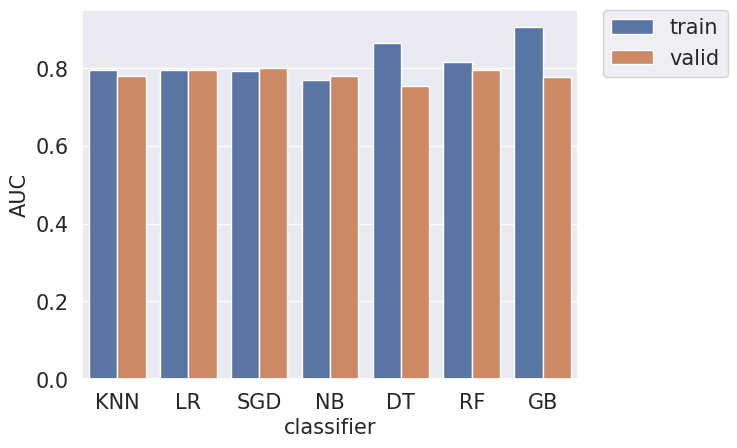

In [87]:
ax = sns.barplot(x ='classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Put the Legend out of the figure

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0, fontsize = 15)
plt.show()

# **Learning Curve**

In [88]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [89]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

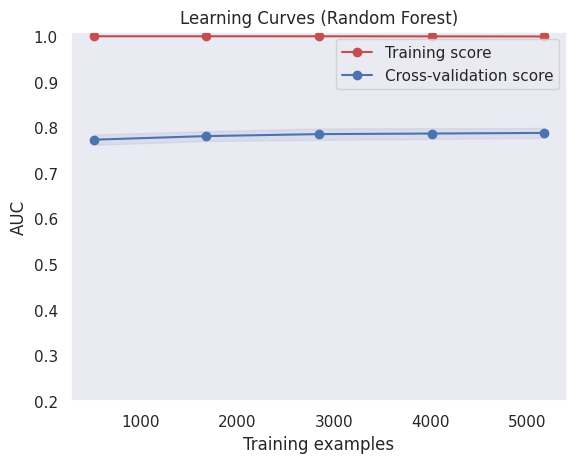

In [90]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

High Variance:
  - Add more sample
  - Add regularization
  - Reduce number of features
  - Decrease model complexity
  - Add better features
  - Change model architecture

High Bias:
  - Add new features
  - Increase model complexity
  - Reduce regularization
  - Change model architecture

# **Feature Importance**

In [91]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [92]:
feature_importance = pd.DataFrame(lr.coef_[0], index = cols_input, columns = ['Importance']).sort_values('Importance', ascending=False)

In [93]:
feature_importance

,Importance
euribor3m,1.052592
month_jul,0.158409
month_mar,0.132580
month_jun,0.121935
job_retired,0.120473
...,...
month_nov,-0.159444
pdays,-0.226762
month_may,-0.235695
emp.var.rate,-0.786407


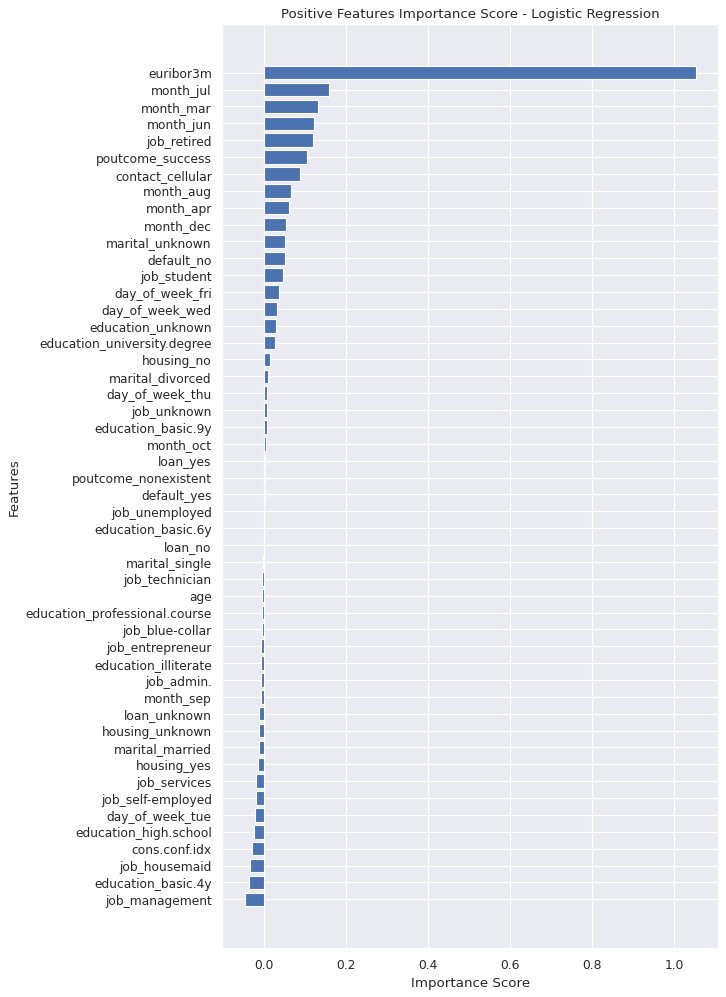

In [94]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# Get the feature importance for top num and sort in reverse order
values_to_plot = feature_importance.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importance.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8,15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Features Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

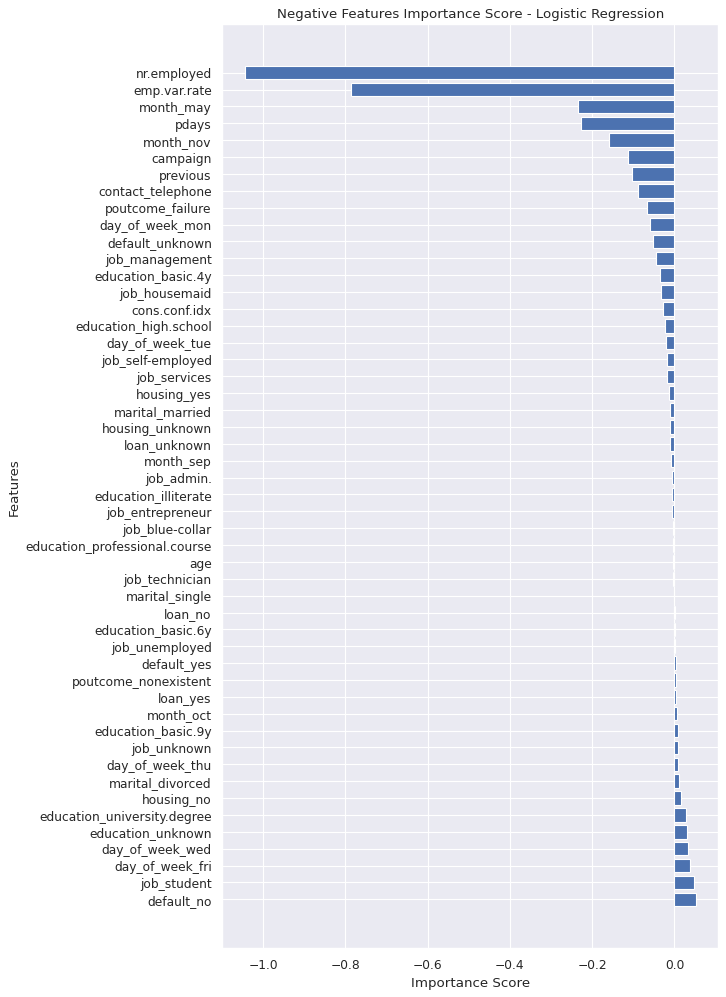

In [95]:
values_to_plot = feature_importance.iloc[-num:].values.ravel()
feature_labels = list(feature_importance.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi = 80, facecolor = 'w', edgecolor = 'k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Features Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [96]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [99]:
feature_importance = pd.DataFrame(rf.feature_importances_, index = cols_input, columns = ['Importance']).sort_values('Importance', ascending = False)

feature_importance.head()

,Importance
nr.employed,0.201125
euribor3m,0.172657
emp.var.rate,0.134433
cons.conf.idx,0.099037
pdays,0.067569


<function matplotlib.pyplot.show(close=None, block=None)>

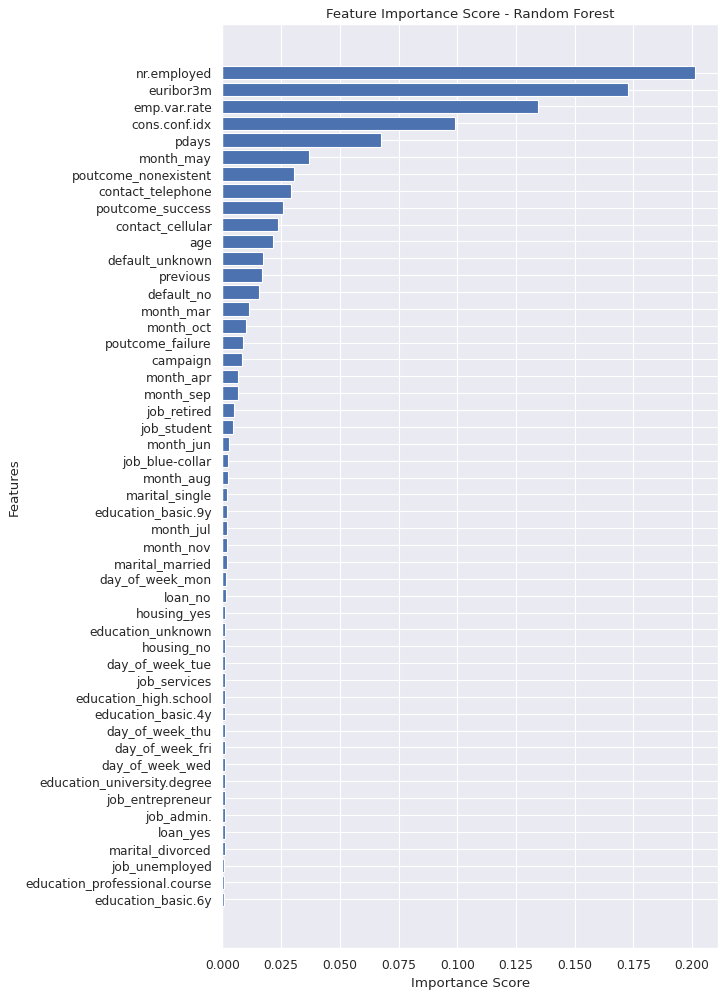

In [101]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# Get the feature importance for the top num and sort in reverse order

values_to_plot = feature_importance.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importance.iloc[:num].index)[::-1]

plt.figure(num = None, figsize = (8, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show

In [102]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth = 3, random_state = 42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [104]:
feature_importance = pd.DataFrame(gbc.feature_importances_, index = cols_input, columns = ['Importance']).sort_values('Importance', ascending = False)

feature_importance.head()

,Importance
nr.employed,0.416879
cons.conf.idx,0.134814
euribor3m,0.109944
age,0.071239
campaign,0.024123


<function matplotlib.pyplot.show(close=None, block=None)>

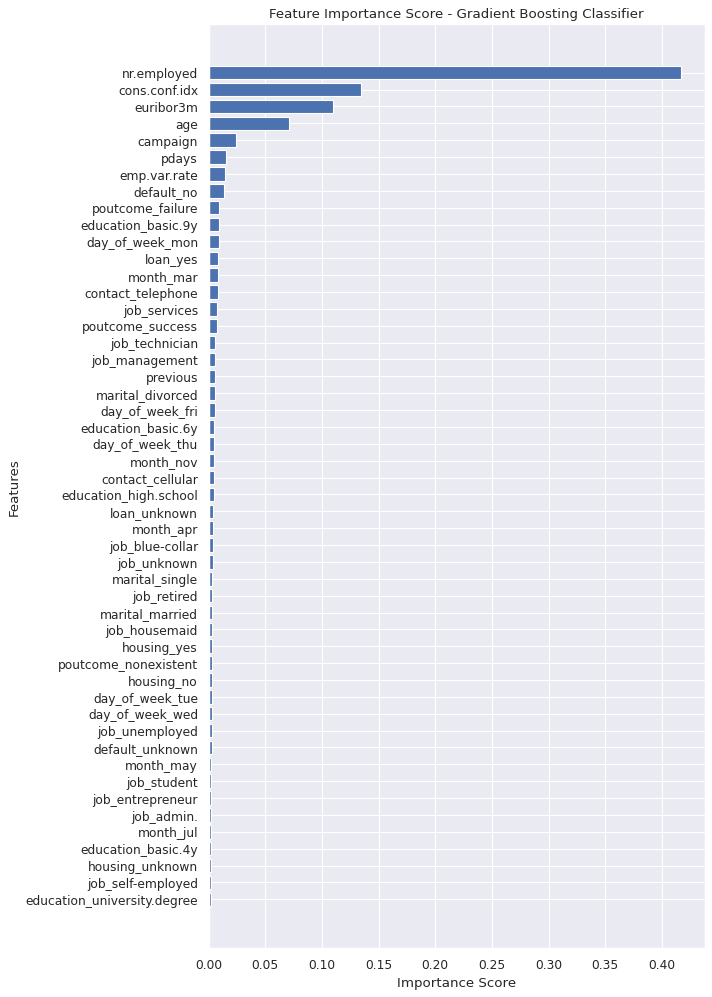

In [105]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# Get the feature importance for the top num and sort in reverse order

values_to_plot = feature_importance.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importance.iloc[:num].index)[::-1]

plt.figure(num = None, figsize = (8, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show

In [106]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [107]:
feature_importance = pd.DataFrame(tree.feature_importances_, index = cols_input, columns = ['Importance']).sort_values('Importance', ascending = False)

feature_importance.head()

,Importance
nr.employed,0.474744
cons.conf.idx,0.142189
euribor3m,0.059584
age,0.055403
campaign,0.036665


<function matplotlib.pyplot.show(close=None, block=None)>

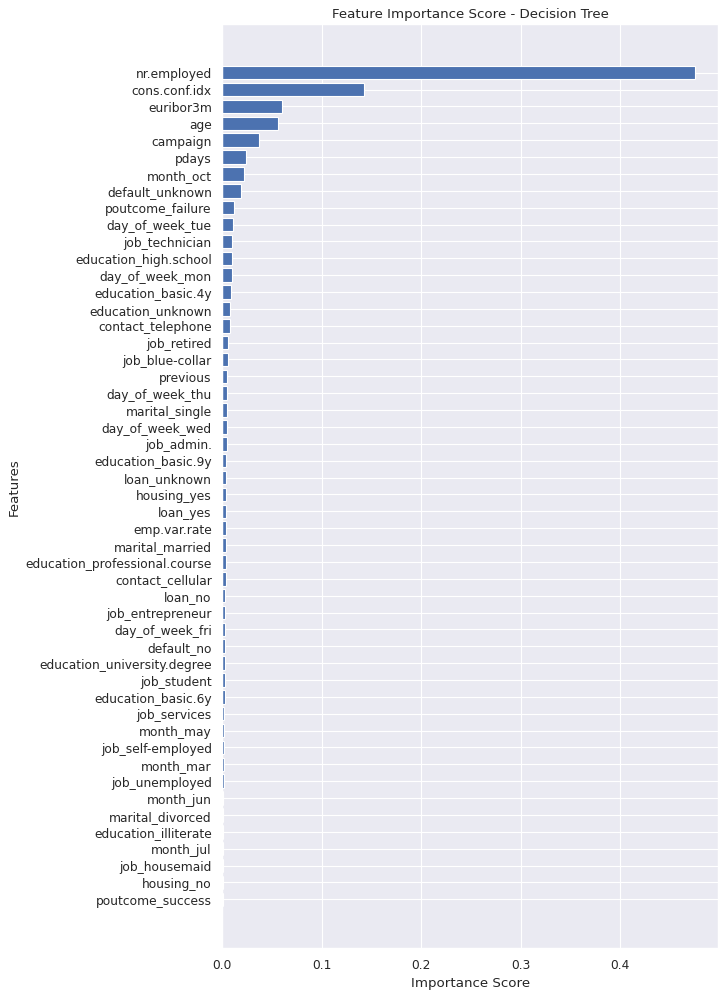

In [108]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# Get the feature importance for the top num and sort in reverse order

values_to_plot = feature_importance.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importance.iloc[:num].index)[::-1]

plt.figure(num = None, figsize = (8, 15), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Tree')
plt.yticks(ylocs, feature_labels)
plt.show

# **Hyper Parameter Tuning**

In [111]:
# Train the model for each max_depth in a list. Store the auc for the training and validation set

# max_depths

max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
  max_depth = max_depths[jj]

  # fit model
  rf = RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
  rf.fit(X_train_tf, y_train)
  # Get Predictions
  y_train_preds = rf.predict_proba(X_train_tf)[:,1]
  y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

  # Calculate AUC
  auc_train = roc_auc_score(y_train, y_train_preds)
  auc_valid = roc_auc_score(y_valid, y_valid_preds)

  # Save AUCs
  train_aucs[jj] = auc_train
  valid_aucs[jj] = auc_valid


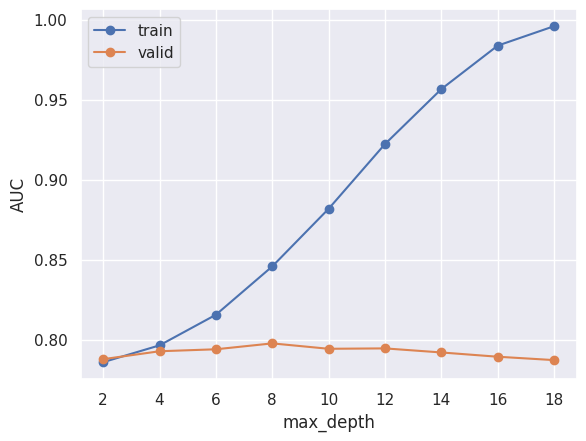

In [112]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs, 'o-', label = 'train')
plt.plot(max_depths, valid_aucs, 'o-', label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [113]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [114]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200, 1000, 200)
# maximum number of features to use at each split
max_features = ['auto', 'sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini', 'entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'criterion':criterion}

print(random_grid)


{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [115]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [116]:
# Create a baseline model
rf = RandomForestClassifier()

# Create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, scoring = auc_scoring, verbose = 1, random_state = 42)

In [117]:
import time
# fit the random search model
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
64.42898106575012


In [118]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

In [120]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.816
Validation AUC:0.794
Optimized Random Forest
Training AUC:0.843
Validation AUC:0.797


In [121]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log_loss', alpha = 0.1, random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [122]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.3401012420654297


In [123]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 200, 'alpha': 0.1}

In [124]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.792
Validation AUC:0.800
Optimized sgdc
Training AUC:0.792
Validation AUC:0.800


In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [126]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

27.743547916412354


In [127]:
gbc_random.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [128]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.905
Validation AUC:0.777
Optimized gbc
Training AUC:0.813
Validation AUC:0.796


In [129]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [130]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.799932
1,SGD,optimized,0.799932
2,RF,baseline,0.794071
3,RF,optimized,0.797367
4,GB,baseline,0.776712
5,GB,optimized,0.796074


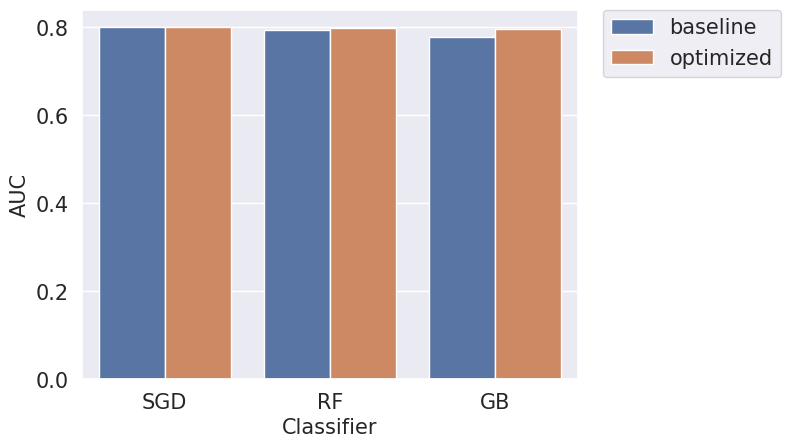

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()



In [132]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# **Model Evaluation**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [134]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [135]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [138]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['Output_Label'].values
y_valid = df_valid['Output_Label'].values
y_test = df_test['Output_Label'].values

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [139]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [140]:
thresh = .5

In [141]:
print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC: 0.813
Accuracy: 0.756
Recall: 0.651
Precision: 0.823
Specificity: 0.860
F1: 0.727
Validation:
AUC: 0.796
Accuracy: 0.755
Recall: 0.657
Precision: 0.818
Specificity: 0.854
F1: 0.729
Test:
AUC: 0.793
Accuracy: 0.740
Recall: 0.620
Precision: 0.815
Specificity: 0.860
F1: 0.704


# **ROC Curve**

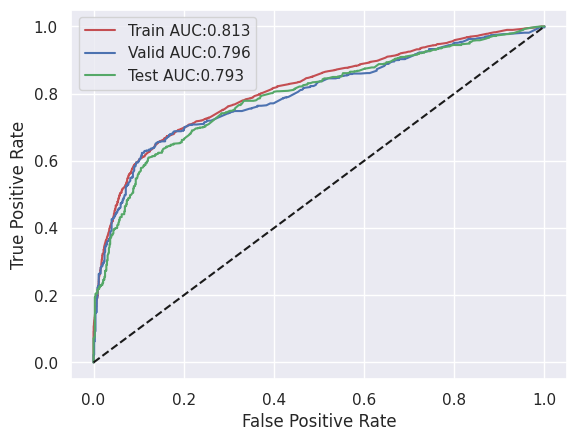

In [142]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# **Conclusion**

Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 79.5%.

A precision of 0.82 divided by a prevalence of 0.50 gives us 1.6, which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 62% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and euribor3m (3 month indicator for paying off loans) as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.
